# Linear Regression Review (sample solution)


---

In [0]:
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [2]:
# A:Create and show dict
dict={'X':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ],
      'Y':[.5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]}
dict

{'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Y': [0.5, 0.7, 0.8, 0.99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]}

### Using that dictionary, create a pandas DataFrame and call it pre_df

In [3]:
# A:Create and show pre_df
pre_df= pd.DataFrame(dict)
pre_df

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data  

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [4]:
# A: Create and show new_data
X10 = pre_df.X +10
Y3 = pre_df.Y +3
new_data = pd.concat([X10,Y3],axis=1)
new_data

,X,Y
0,11,3.50
1,12,3.70
2,13,3.80
3,14,3.99
4,15,4.00
5,16,4.40
6,17,4.80
7,18,5.10
8,19,5.40
9,20,5.90


### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [5]:
# A:Create and show df
df = pd.concat([pre_df, new_data],ignore_index = True)
df.head(20)

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the color of the markers to black

Text(0.5, 1.0, 'X vs Y')

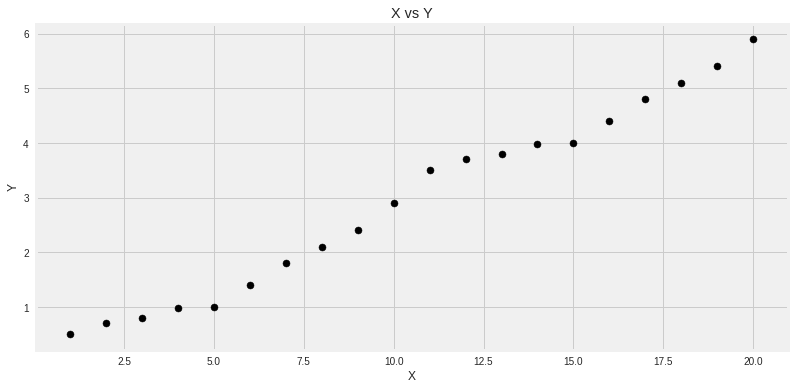

In [6]:
# A:
fig = plt.figure(figsize=(12,6)) 
plt.scatter(df.X, df.Y, color='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X vs Y")
# df.plot(kind='scatter', x='X', y='Y', title='X vs. y',color='black',figsize=(12,6))

### Using Linear Regression, fit a regression model to your data and print out the score

In [0]:
# Identify feature(s) and target
feature = df[['X']]
target = df.Y

In [0]:
# A:5 steps in using scikit learn for machine learning
# step 1: Import the class you plan to use(done above)
# step 2: make an instance copy of the estimator class
lr = LinearRegression()

In [9]:
# step 3: train(fit) the model with the feature and target
lr.fit(feature, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
# step 4: find out what is the score of the model with the given feature and target
print(lr.score(feature, target))

0.9860390205423032


In [0]:
#step 5: predict the response of given observation(feature) and add it as a new column to the dataframe
df['prediction']=lr.predict(feature)

In [12]:
#show side by side the values of target and prediction
df.head(20)

,X,Y,prediction
0,1,0.50,0.204286
1,2,0.70,0.494256
2,3,0.80,0.784226
3,4,0.99,1.074195
4,5,1.00,1.364165
5,6,1.40,1.654135
6,7,1.80,1.944105
7,8,2.10,2.234075
8,9,2.40,2.524045
9,10,2.90,2.814015


## Using the model you fitted, answer the following questions:

### What is the intercept of your linear estimator model?

In [13]:
#A
lr.intercept_

-0.08568421052631647

### What is the slope of your linear estimator model?

In [14]:
#A
lr.coef_

array([0.28996992])

### Using the above, write the equation for our model

In [15]:
# A:
print("Y = %.2f * X + %.2f" % (lr.coef_, lr.intercept_))

Y = 0.29 * X + -0.09


### Use the linear estimator equation to solve for Y for an X of 10

In [16]:
# A:
print("Y = %.3f" % (lr.coef_ * 10 + lr.intercept_))

Y = 2.814


### Use the linear estimator modle to predict  Y for an X of 10. 
#### Is it consistent with the value found by using the linear estimator equation?

In [17]:
# A:
X_in = pd.Series(10).values.reshape(-1,1)
print("%.3f" %(lr.predict(X_in) ))
print(type(X_in) )

2.814
<class 'numpy.ndarray'>


### Get the RMSE by using the predictions for every X (prediction) and the true Y values

In [18]:
# A:
print('RMSE:', np.sqrt(metrics.mean_squared_error(df.Y, df.prediction)))

RMSE: 0.1989572062650962


### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

Text(0, 0.5, 'Y/predict')

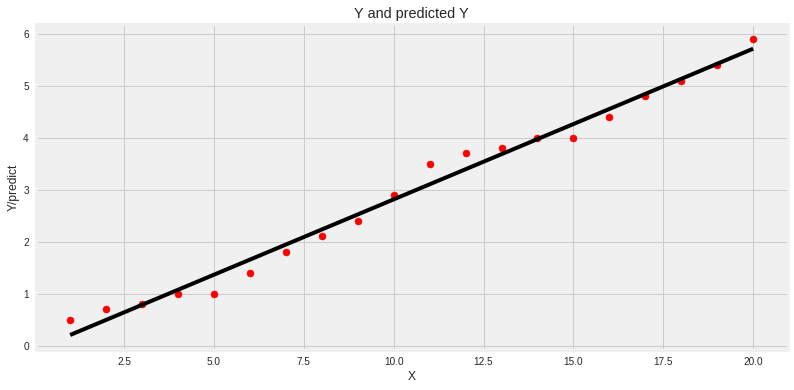

In [19]:
# A:
fig = plt.figure(figsize=(12, 6))
plt.scatter( df.X, df.Y,color='red')
plt.plot(df.X, df.prediction, color='black')
plt.title("Y and predicted Y")
plt.xlabel("X")
plt.ylabel("Y/predict")